___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [268]:
df = pd.read_csv('heart.csv')

In [269]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


# EDA

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [271]:
df.shape

(303, 14)

In [272]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [273]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [283]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [274]:
df.columns[:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [275]:
categorical_features=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numeric_features=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [276]:
df.cp.unique()

array([3, 2, 1, 0])

In [278]:
df['cp']=df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})

In [277]:
df.restecg.unique()

array([0, 1, 2])

In [279]:
df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})

In [280]:
df.slope.unique()

array([0, 2, 1])

In [281]:
df['slope']=df['slope'].replace({0:'upsloping',1:'flat',2:'downsloping'})

In [288]:
df.thal.unique()

array([1, 2, 3, 0])

In [ ]:
#thal: A blood disorder called thalassemia 
#Value 0: NULL (dropped from the dataset previously
#Value 1: fixed defect (no blood flow in some part of the heart)
#Value 2: normal blood flow
#Value 3: reversible defect (a blood flow is observed but it is not normal)

In [289]:
df['thal']=df['thal'].replace({0:'NULL',1:'fixed defect',2:'normal blood flow',3:'reversible defect'})

In [290]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.300,upsloping,0,fixed defect,1
1,37,1,non-anginal pain,130,250,0,having ST-T wave abnormality,187,0,3.500,upsloping,0,normal blood flow,1
2,41,0,atypical angina,130,204,0,normal,172,0,1.400,downsloping,0,normal blood flow,1
3,56,1,atypical angina,120,236,0,having ST-T wave abnormality,178,0,0.800,downsloping,0,normal blood flow,1
4,57,0,typical angina,120,354,0,having ST-T wave abnormality,163,1,0.600,downsloping,0,normal blood flow,1


In [291]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [292]:
df.target.value_counts(normalize=True)

1   0.545
0   0.455
Name: target, dtype: float64

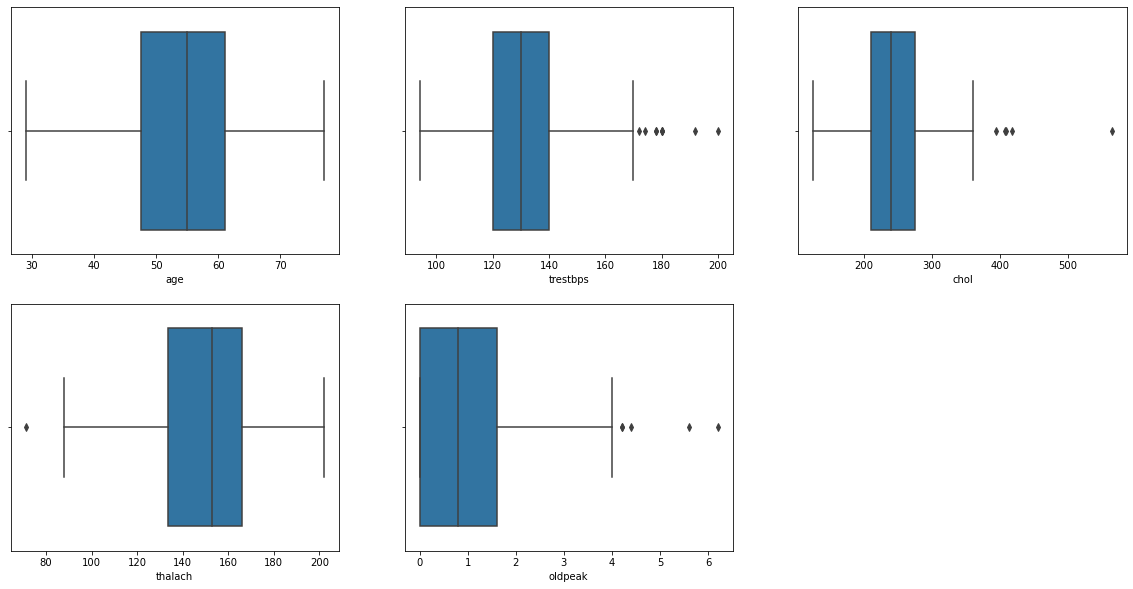

In [293]:
index = 0
plt.figure(figsize=(20,10))
for feature in df[numeric_features]:
    index += 1
    plt.subplot(2,3,index)
    sns.boxplot(df[feature])

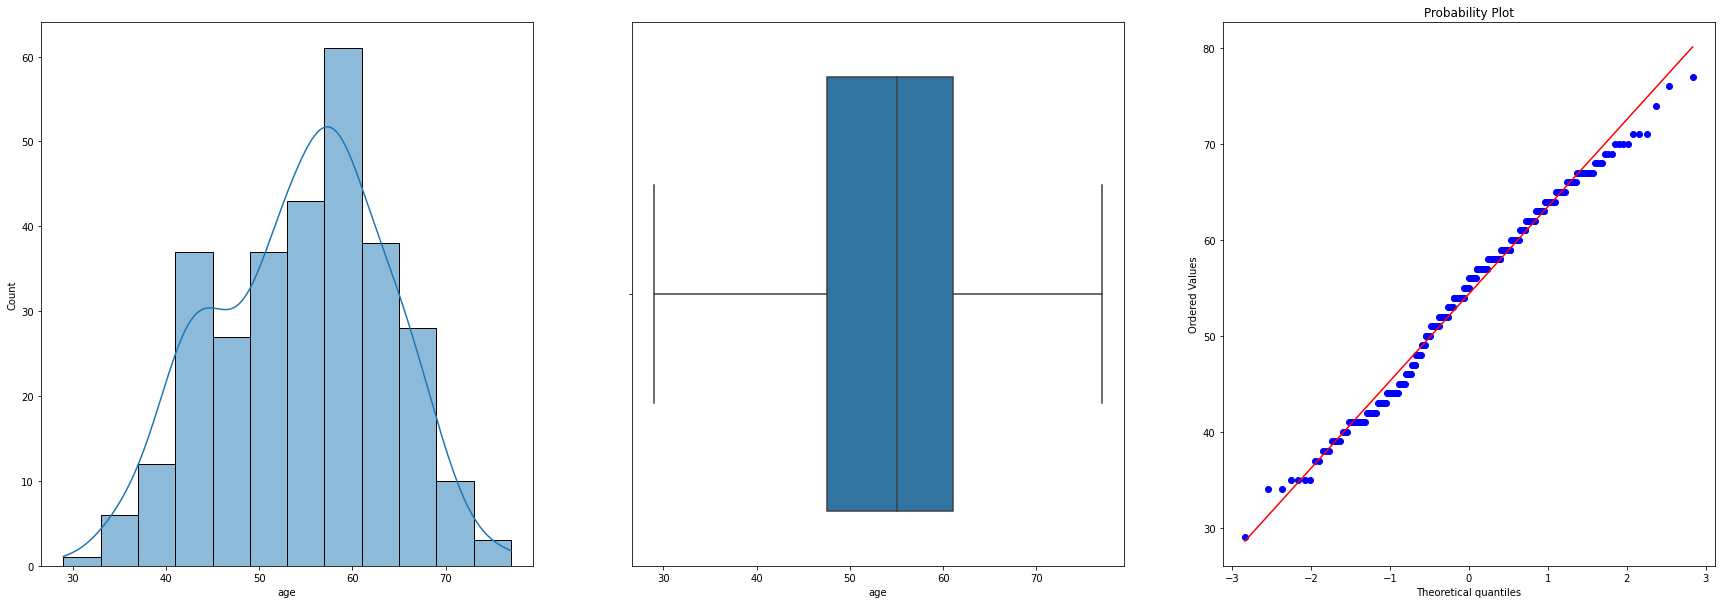

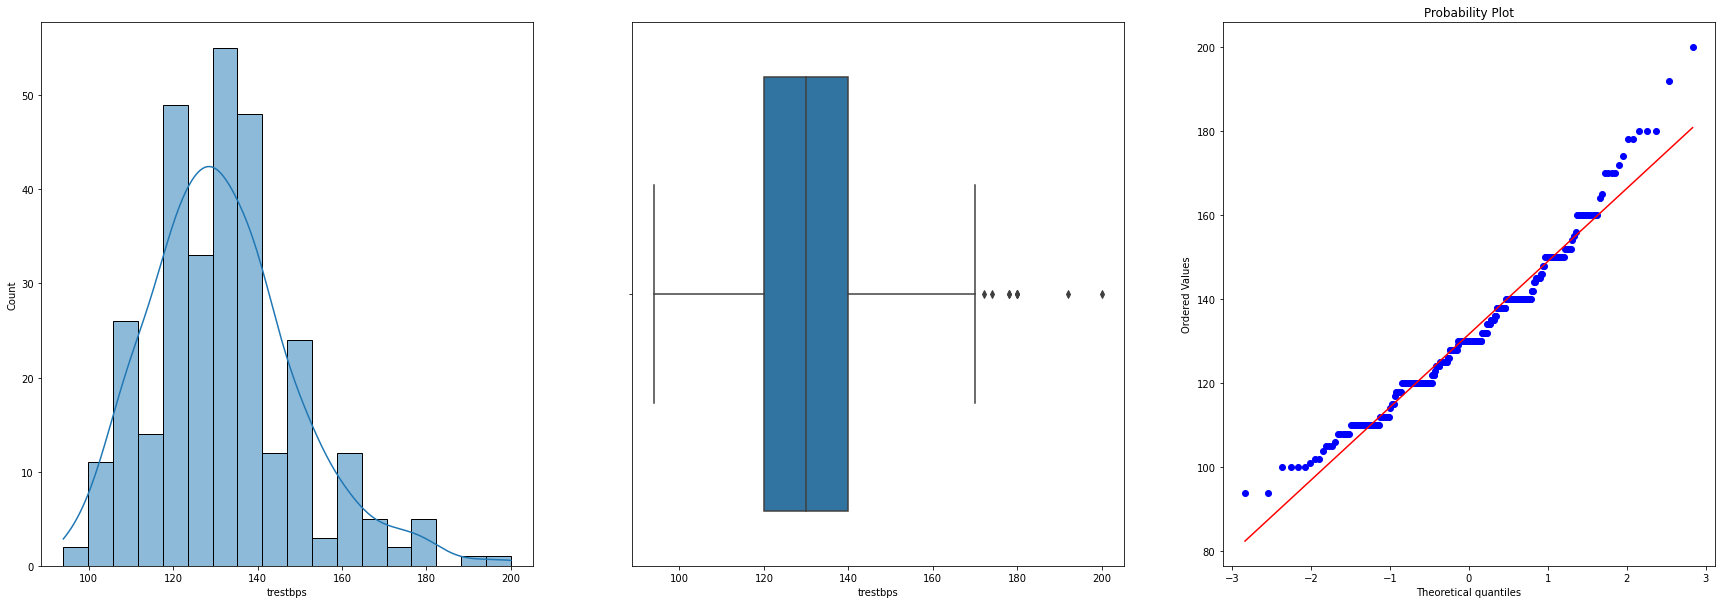

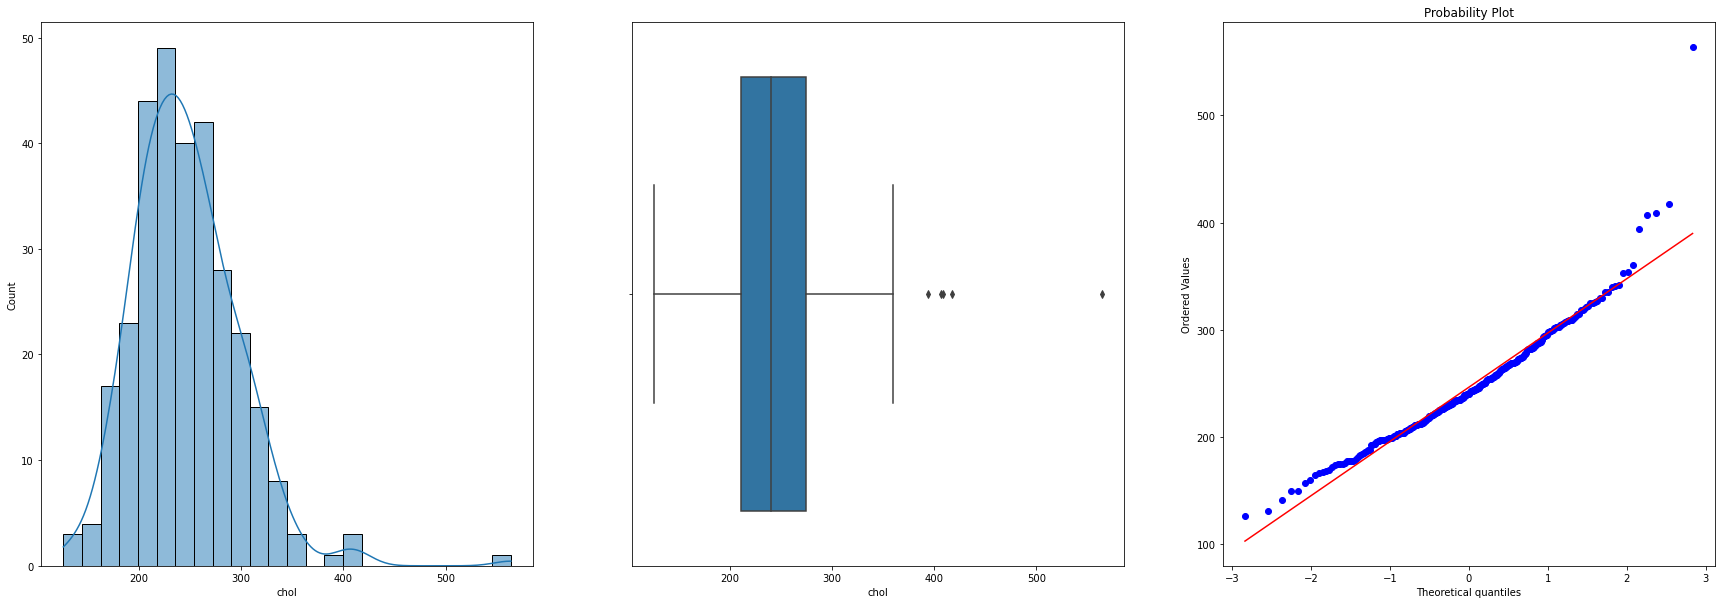

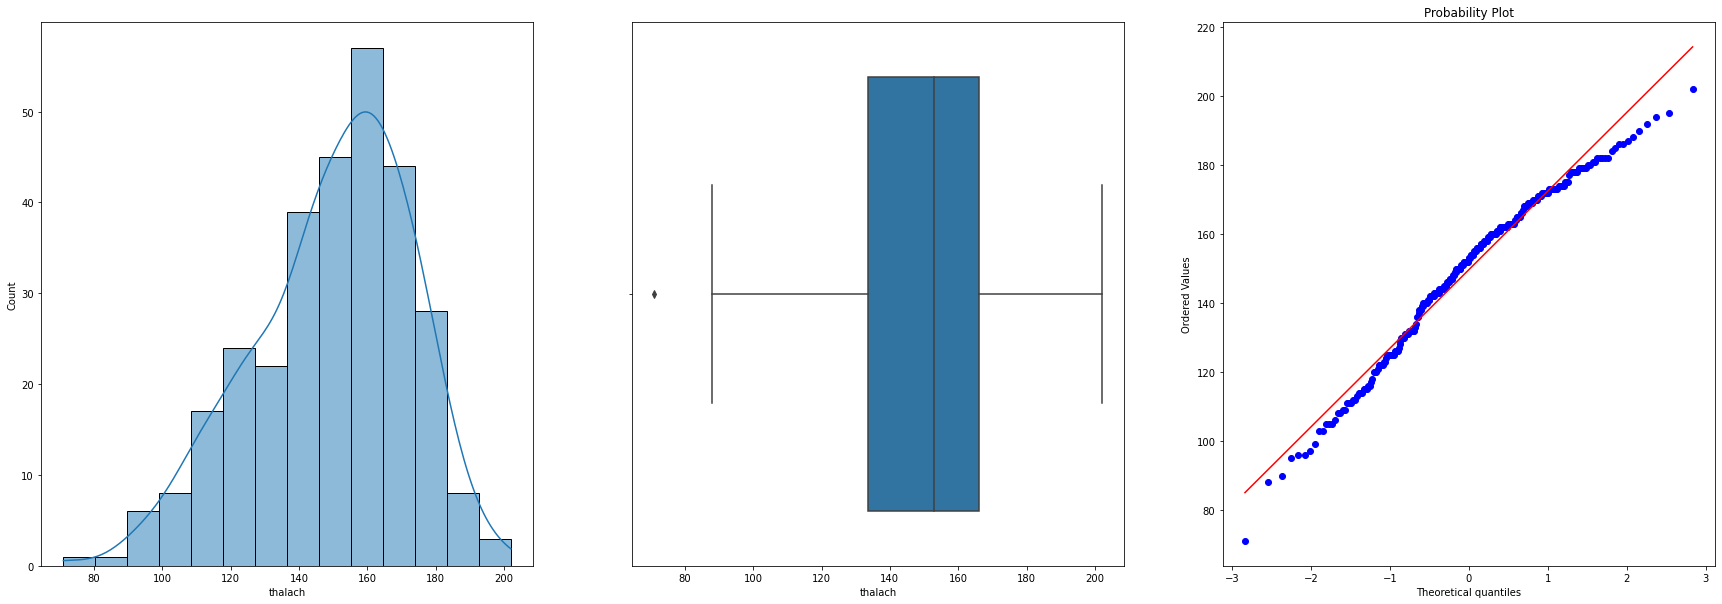

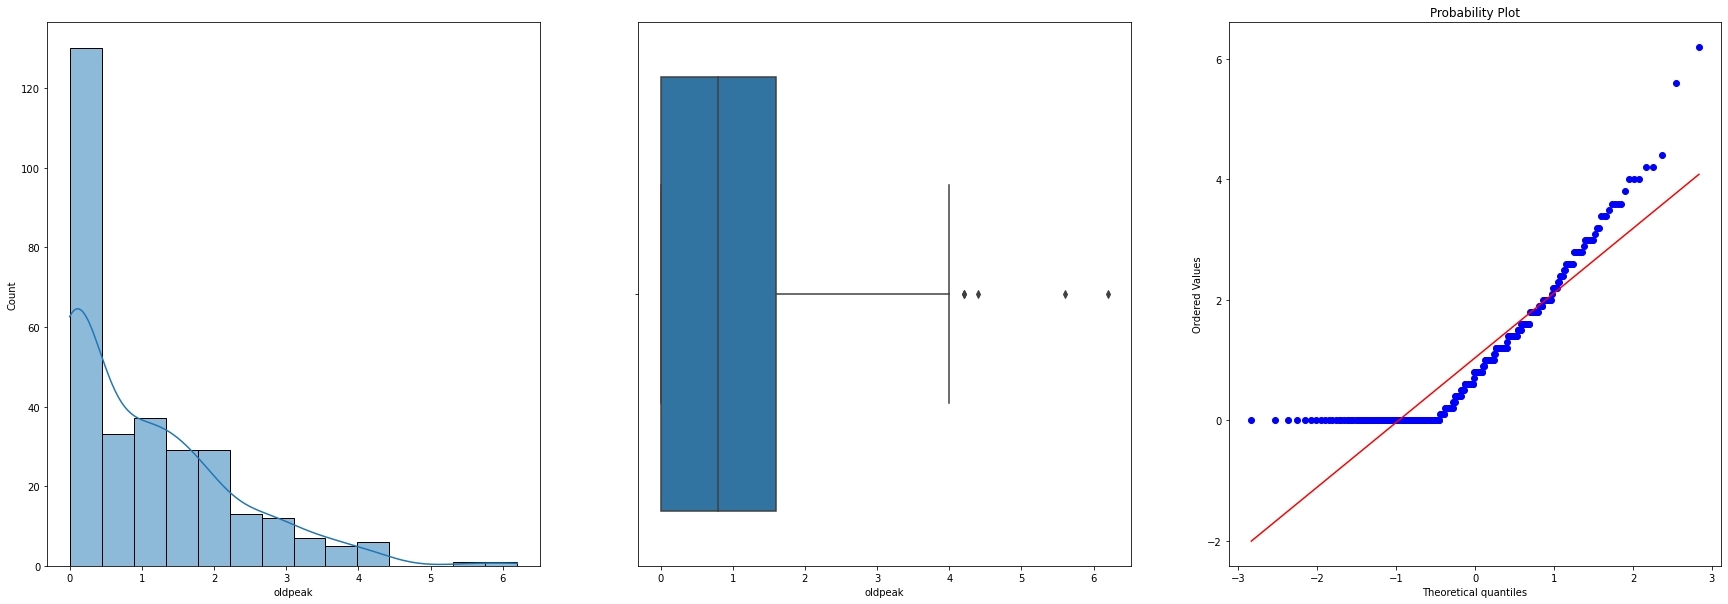

In [294]:
import scipy.stats as stats
for feature in df[numeric_features]:
    plt.figure(figsize=(30,10))
    plt.subplot(1, 3, 1)
    sns.histplot(x=feature, data=df, kde=True)
    plt.subplot(1, 3, 2)
    sns.boxplot(x=feature, data=df)
    plt.subplot(1, 3, 3)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

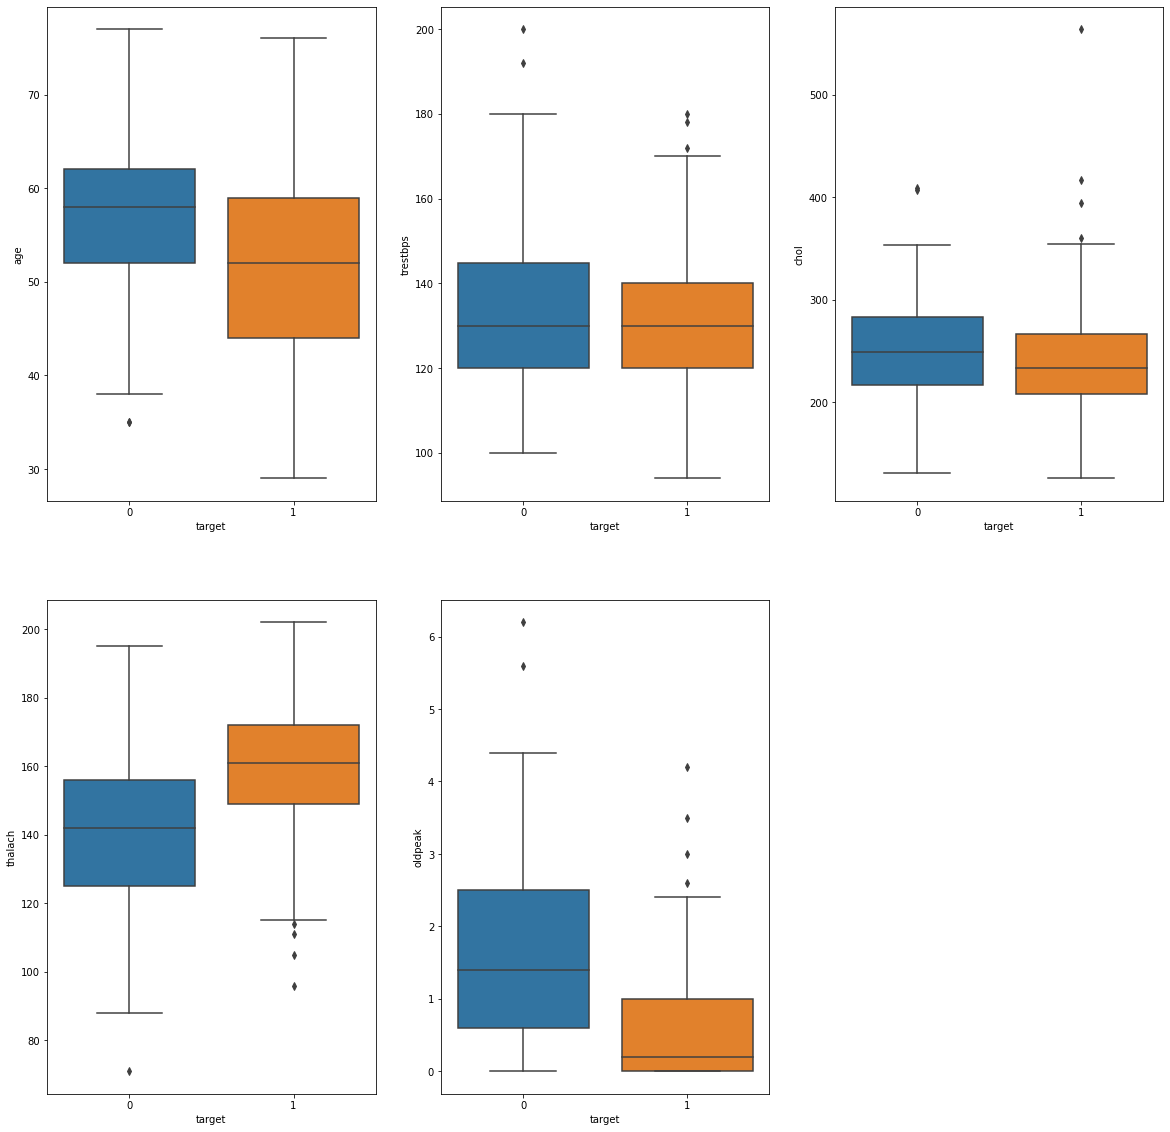

In [295]:
index = 0
plt.figure(figsize=(20,20))
for feature in df[numeric_features]:
    index += 1
    plt.subplot(2,3,index)
    sns.boxplot(x='target',y=feature,data=df)

<Figure size 720x576 with 0 Axes>

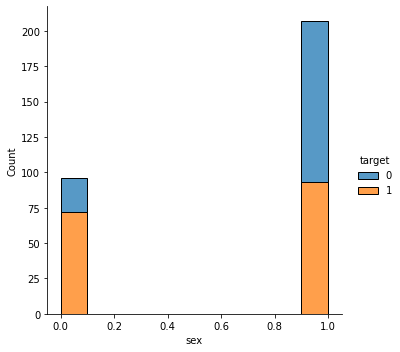

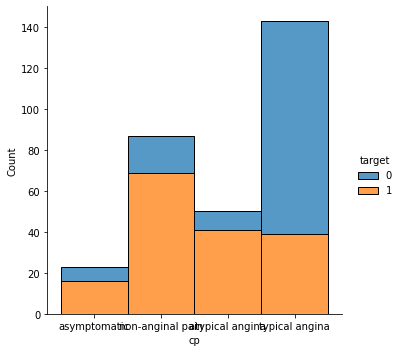

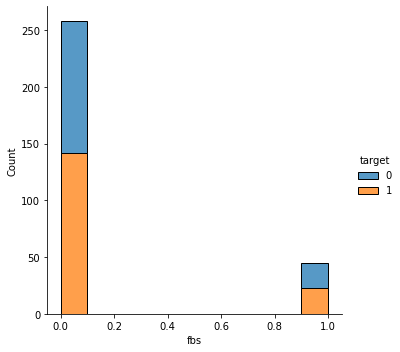

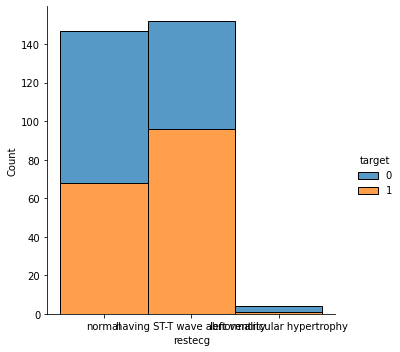

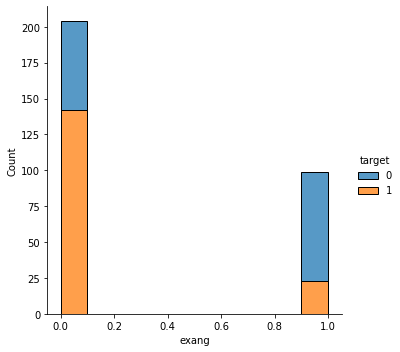

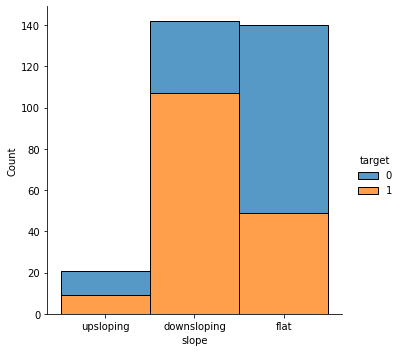

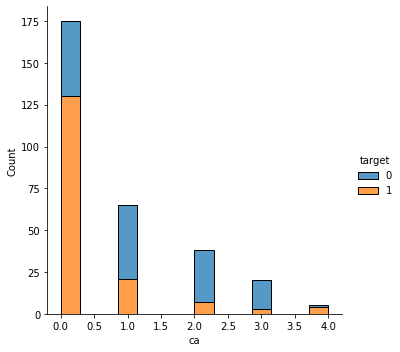

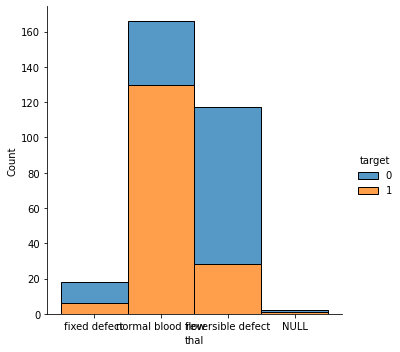

In [296]:
plt.figure(figsize=(10,8))
for feature in df[categorical_features]:
    sns.displot(df, x=feature, hue='target', multiple='stack')

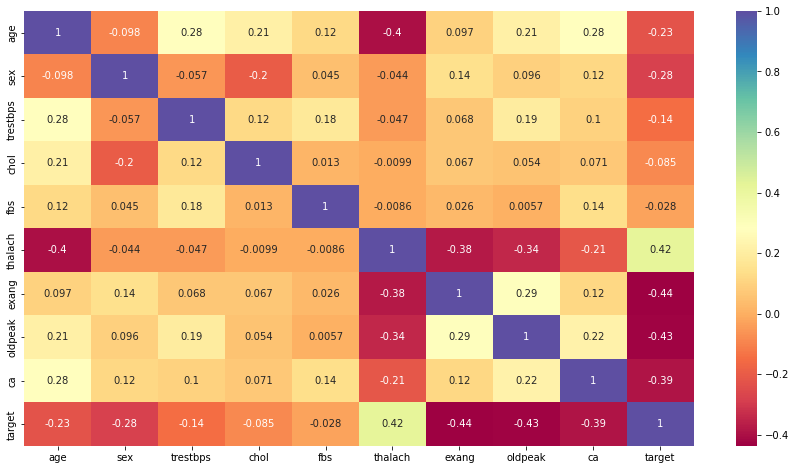

In [297]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot = True, cmap="Spectral");

<AxesSubplot:>

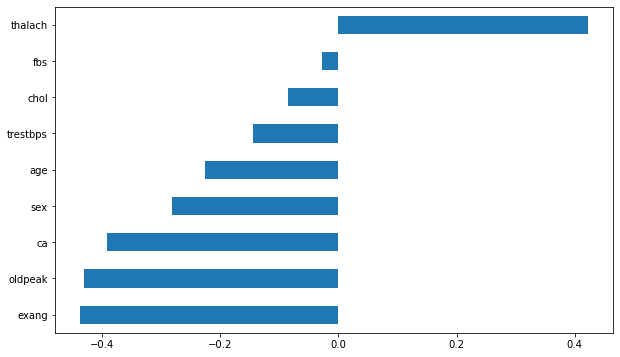

In [299]:
df.corr()["target"].drop("target").sort_values().plot.barh()

# Data Preprocessing

In [300]:
df=pd.get_dummies(df,drop_first=True)

In [301]:
X=df.drop('target',axis=1)
y=df['target']

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [304]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(212, 19) (91, 19) (212,) (91,)


In [305]:
scaler = MinMaxScaler()

In [306]:
X_train=scaler.fit_transform(X_train)

In [307]:
X_test=scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [308]:
from sklearn.linear_model import LogisticRegression
logmod = LogisticRegression()
logmod.fit(X_train,y_train)

LogisticRegression()

In [309]:
y_pred = logmod.predict(X_test)

In [310]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1])

In [311]:
df_test = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_test.head(10)

,Actual,Predicted
198,0,0
5,1,0
39,1,1
203,0,0
196,0,1
260,0,0
276,0,0
128,1,1
185,0,1
255,0,0


### Checking the Metrics

In [312]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

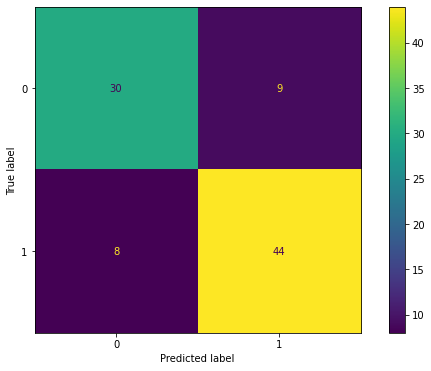

In [314]:
plot_confusion_matrix(logmod, X_test, y_test)

In [315]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30  9]
 [ 8 44]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        39
           1       0.83      0.85      0.84        52

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [316]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [317]:
def eval_metric(actual, pred):
    Accuracy = accuracy_score(actual, pred)
    Precision = precision_score(actual, pred)
    Recall = recall_score(actual, pred)
    F1 = f1_score(actual, pred, average = 'weighted')
    print("Classification Metrics:")
    print("----------------------")
    print(f"Accuracy \t: {round(Accuracy,3)}")
    print(f"Precision \t: {round(Precision,3)}")
    print(f"Recall \t\t: {round(Recall,3)}")
    print(f"F1_weighted \t: {round(F1,3)}") 

In [318]:
eval_metric(y_test, y_pred)

Classification Metrics:
----------------------
Accuracy 	: 0.813
Precision 	: 0.83
Recall 		: 0.846
F1_weighted 	: 0.813


In [319]:
scores = {"M1": {"Accuracy" : accuracy_score(y_test, y_pred),
    "Precision" : precision_score(y_test, y_pred),
    "Recall" : recall_score(y_test, y_pred),
    "F1_weighted" : f1_score(y_test, y_pred, average = 'weighted')}}
base_log_model=pd.DataFrame(scores)

In [320]:
base_log_model

,M1
Accuracy,0.813
F1_weighted,0.813
Precision,0.830
Recall,0.846


### Cross Validate

In [321]:
from sklearn.model_selection import cross_validate

In [322]:
model = LogisticRegression()
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.831
test_precision     0.844
test_recall        0.841
test_f1_weighted   0.830
dtype: float64

In [323]:
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_weighted
1,0.012,0.003,0.682,0.692,0.750,0.680
2,0.004,0.001,0.864,0.909,0.833,0.864
3,0.003,0.001,0.857,0.833,0.909,0.856
4,0.003,0.001,0.857,0.900,0.818,0.857
5,0.003,0.001,0.905,0.909,0.909,0.905
6,0.002,0.001,0.571,0.600,0.545,0.571
7,0.003,0.001,0.905,0.846,1.000,0.903
8,0.002,0.001,0.857,0.833,0.909,0.856
9,0.003,0.001,0.905,1.000,0.818,0.904
10,0.003,0.001,0.905,0.917,0.917,0.905


### ROC and AUC

In [324]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

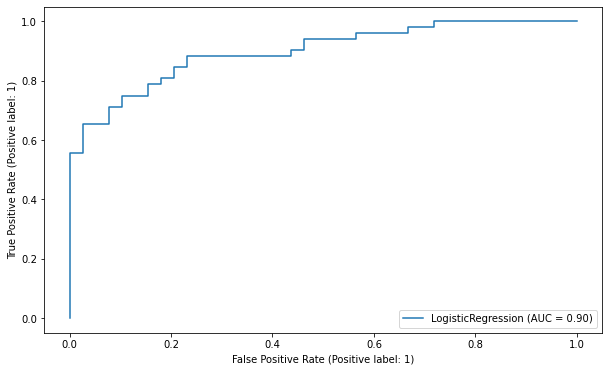

In [326]:
plot_roc_curve(logmod, X_test, y_test);

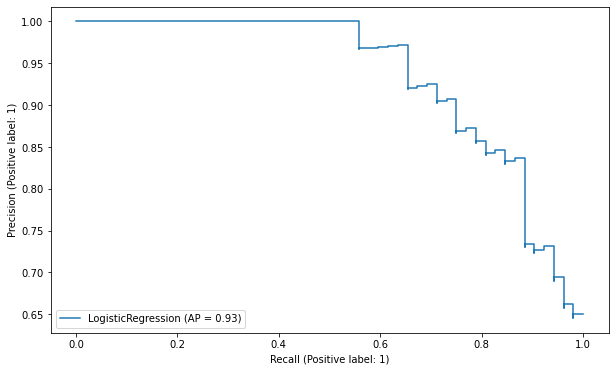

In [327]:
plot_precision_recall_curve(logmod, X_test, y_test);

### Finding Best Threshold

In [328]:
y_train_pred_proba = logmod.predict_proba(X_train)
roc_auc_score(y_train, y_train_pred_proba[:,1])

0.9317064449807813

In [329]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_train_pred_proba[:,1])

In [330]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5380530947772426

In [331]:
roc_curve = {"fp_rate":fp_rate, "tp_rate":tp_rate, "thresholds":thresholds}
df_roc_curve = pd.DataFrame(roc_curve)

In [332]:
optimal_idx = np.argmax(df_roc_curve.tp_rate - df_roc_curve.fp_rate)
optimal_threshold = df_roc_curve.thresholds[optimal_idx]
optimal_threshold

0.5380530947772426

In [333]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

In [334]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5199192544832532

In [335]:
y_proba_test = logmod.predict_proba(X_test)

In [336]:
y_pred2=np.zeros(len(y_proba_test))

In [337]:
y_pred2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [338]:
for i in range(0,len(y_proba_test)):
    if y_proba_test[i,1]>= optimal_threshold :
        y_pred2 [i] = 1
    else :
        y_pred2 [i] = 0

In [339]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1])

In [340]:
y_pred2

array([0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1.])

In [341]:
eval_metric(y_test, y_pred2)

Classification Metrics:
----------------------
Accuracy 	: 0.813
Precision 	: 0.857
Recall 		: 0.808
F1_weighted 	: 0.814


In [355]:
scores = {"M2": {"Accuracy" : accuracy_score(y_test, y_pred2),
    "Precision" : precision_score(y_test, y_pred2),
    "Recall" : recall_score(y_test, y_pred2),
    "F1_weighted" : f1_score(y_test, y_pred2, average = 'weighted')}}
new_treshold_log_model=pd.DataFrame(scores)

In [356]:
new_treshold_log_model

,M2
Accuracy,0.813
F1_weighted,0.814
Precision,0.857
Recall,0.808


In [357]:
pd.concat([base_log_model, new_treshold_log_model], axis = 1)

,M1,M2
Accuracy,0.813,0.813
F1_weighted,0.813,0.814
Precision,0.830,0.857
Recall,0.846,0.808


### With Best Parameters (GridsearchCV)

In [345]:
from sklearn.model_selection import GridSearchCV

In [ ]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [346]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : [C,1],
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1)

In [347]:
grid_model.fit(X_train,y_train)

/Users/hakantekin/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hakantekin/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                               1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [348]:
grid_model.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}

In [358]:
y_pred3 = grid_model.predict(X_test)

In [359]:
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[30  9]
 [ 8 44]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        39
           1       0.83      0.85      0.84        52

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [360]:
eval_metric(y_test, y_pred3)

Classification Metrics:
----------------------
Accuracy 	: 0.813
Precision 	: 0.83
Recall 		: 0.846
F1_weighted 	: 0.813


In [361]:
scores = {"M3": {"Accuracy" : accuracy_score(y_test, y_pred3),
    "Precision" : precision_score(y_test, y_pred3),
    "Recall" : recall_score(y_test, y_pred3),
    "F1_weighted" : f1_score(y_test, y_pred, average = 'weighted')}}
best_parameter_log_model=pd.DataFrame(scores)

In [362]:
pd.concat([base_log_model, new_treshold_log_model,best_parameter_log_model], axis = 1)

,M1,M2,M3
Accuracy,0.813,0.813,0.813
F1_weighted,0.813,0.814,0.813
Precision,0.830,0.857,0.830
Recall,0.846,0.808,0.846


# Implement KNN and Evaluate

In [363]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [364]:
knn_pred = knn.predict(X_test)

In [366]:
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[31  8]
 [ 9 43]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        39
           1       0.84      0.83      0.83        52

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [367]:
eval_metric(y_test, knn_pred)

Classification Metrics:
----------------------
Accuracy 	: 0.813
Precision 	: 0.843
Recall 		: 0.827
F1_weighted 	: 0.813


In [368]:
scores = {"M4": {"Accuracy" : accuracy_score(y_test, knn_pred),
    "Precision" : precision_score(y_test, knn_pred),
    "Recall" : recall_score(y_test, knn_pred),
    "F1_weighted" : f1_score(y_test, knn_pred, average = 'weighted')}}
base_knn_model=pd.DataFrame(scores)

In [369]:
base_knn_model

,M4
Accuracy,0.813
F1_weighted,0.813
Precision,0.843
Recall,0.827


In [370]:
pd.concat([base_log_model, new_treshold_log_model,best_parameter_log_model,base_knn_model], axis = 1)

,M1,M2,M3,M4
Accuracy,0.813,0.813,0.813,0.813
F1_weighted,0.813,0.814,0.813,0.813
Precision,0.830,0.857,0.830,0.843
Recall,0.846,0.808,0.846,0.827


### Elbow Method

In [371]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [372]:
test_error_rates = []


for k in range(1,31):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

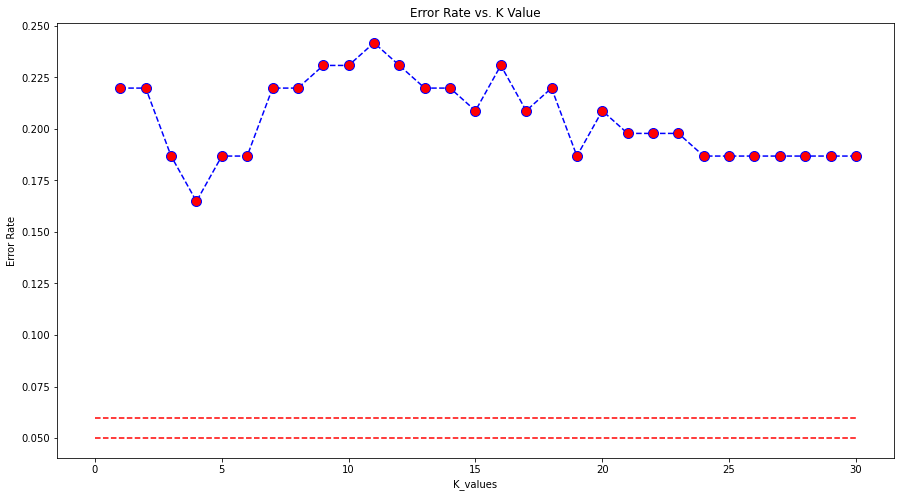

In [373]:
plt.figure(figsize=(15,8))
plt.plot(range(1,31), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.05, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.06, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [374]:
# k=4

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
knn_pred2 = knn.predict(X_test)

In [375]:
print(confusion_matrix(y_test, knn_pred2))
print(classification_report(y_test, knn_pred2))

[[33  6]
 [ 9 43]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        39
           1       0.88      0.83      0.85        52

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



In [376]:
eval_metric(y_test, knn_pred2)

Classification Metrics:
----------------------
Accuracy 	: 0.835
Precision 	: 0.878
Recall 		: 0.827
F1_weighted 	: 0.836


In [377]:
scores = {"M5": {"Accuracy" : accuracy_score(y_test, knn_pred2),
    "Precision" : precision_score(y_test, knn_pred2),
    "Recall" : recall_score(y_test, knn_pred2),
    "F1_weighted" : f1_score(y_test, knn_pred2, average = 'weighted')}}
k4_knn_model=pd.DataFrame(scores)

In [378]:
k4_knn_model

,M5
Accuracy,0.835
F1_weighted,0.836
Precision,0.878
Recall,0.827


In [379]:
pd.concat([base_log_model, new_treshold_log_model,best_parameter_log_model,base_knn_model, k4_knn_model], axis = 1)

,M1,M2,M3,M4,M5
Accuracy,0.813,0.813,0.813,0.813,0.835
F1_weighted,0.813,0.814,0.813,0.813,0.836
Precision,0.830,0.857,0.830,0.843,0.878
Recall,0.846,0.808,0.846,0.827,0.827


### Cross Validate

In [380]:
from sklearn.model_selection import cross_val_score, cross_validate

In [381]:
model = KNeighborsClassifier(n_neighbors=4)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.001,0.005,0.682,0.692,0.750,0.720
2,0.001,0.005,0.727,0.750,0.750,0.750
3,0.001,0.003,0.810,0.889,0.727,0.800
4,0.001,0.002,0.857,0.900,0.818,0.857
5,0.000,0.002,0.857,0.833,0.909,0.870
6,0.000,0.002,0.619,0.667,0.545,0.600
7,0.000,0.002,0.857,0.833,0.909,0.870
8,0.000,0.002,0.810,0.818,0.818,0.818
9,0.000,0.002,0.905,1.000,0.818,0.900
10,0.000,0.002,0.857,1.000,0.750,0.857


In [382]:
df_scores.mean()[2:]

test_accuracy    0.798
test_precision   0.838
test_recall      0.780
test_f1          0.804
dtype: float64

### Gridsearch

In [383]:
knn_grid = KNeighborsClassifier()

In [384]:
k_values= range(1,30)

In [385]:
param_grid = {"n_neighbors":k_values}

In [386]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'recall')

In [387]:
knn_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)}, scoring='recall')

In [388]:
knn_grid_model.best_params_

{'n_neighbors': 27}

In [391]:
knn_pred3 = knn_grid_model.predict(X_test)

In [392]:
print(confusion_matrix(y_test, knn_pred3))
print(classification_report(y_test, knn_pred3))

[[30  9]
 [ 8 44]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        39
           1       0.83      0.85      0.84        52

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [393]:
eval_metric(y_test, knn_pred3)

Classification Metrics:
----------------------
Accuracy 	: 0.813
Precision 	: 0.83
Recall 		: 0.846
F1_weighted 	: 0.813


In [394]:
scores = {"M6": {"Accuracy" : accuracy_score(y_test, knn_pred3),
    "Precision" : precision_score(y_test, knn_pred3),
    "Recall" : recall_score(y_test, knn_pred3),
    "F1_weighted" : f1_score(y_test, knn_pred3, average = 'weighted')}}
k27_knn_model=pd.DataFrame(scores)

In [395]:
k27_knn_model

,M6
Accuracy,0.813
F1_weighted,0.813
Precision,0.830
Recall,0.846


In [396]:
pd.concat([base_log_model, new_treshold_log_model,best_parameter_log_model,base_knn_model, k4_knn_model, k27_knn_model], axis = 1)

,M1,M2,M3,M4,M5,M6
Accuracy,0.813,0.813,0.813,0.813,0.835,0.813
F1_weighted,0.813,0.814,0.813,0.813,0.836,0.813
Precision,0.830,0.857,0.830,0.843,0.878,0.830
Recall,0.846,0.808,0.846,0.827,0.827,0.846
